データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.37
                : 10. 正答率(テスト) = 0.2355
Generation: 20. 正答率(トレーニング) = 0.17
                : 20. 正答率(テスト) = 0.1982
Generation: 30. 正答率(トレーニング) = 0.3
                : 30. 正答率(テスト) = 0.2763
Generation: 40. 正答率(トレーニング) = 0.42
                : 40. 正答率(テスト) = 0.4866
Generation: 50. 正答率(トレーニング) = 0.5
                : 50. 正答率(テスト) = 0.5499
Generation: 60. 正答率(トレーニング) = 0.34
                : 60. 正答率(テスト) = 0.4358
Generation: 70. 正答率(トレーニング) = 0.53
                : 70. 正答率(テスト) = 0.5336
Generation: 80. 正答率(トレーニング) = 0.67
                : 80. 正答率(テスト) = 0.6482
Generation: 90. 正答率(トレーニング) = 0.63
                : 90. 正答率(テスト) = 0.6211
Generation: 100. 正答率(トレーニング) = 0.65
                : 100. 正答率(テスト) = 0.6948
Generation: 110. 正答率(トレーニング) = 0.73
                : 110. 正答率(テスト) = 0.7177
Generation: 120. 正答率(トレーニング) = 0.85
                : 120. 正答率(テスト) = 0.7488
Generation: 130. 正答率(トレーニング) = 0.76
                : 130. 正答率(テスト) = 0.7631
Generatio

c:\users\yoshi\anaconda3\envs\e-shikaku\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 27491 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\yoshi\anaconda3\envs\e-shikaku\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 31572 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\yoshi\anaconda3\envs\e-shikaku\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 29575 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\yoshi\anaconda3\envs\e-shikaku\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 27491 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\yoshi\anaconda3\envs\e-shikaku\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 31572 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\yoshi\anaconda3\envs\e-shikaku\lib\site-packa

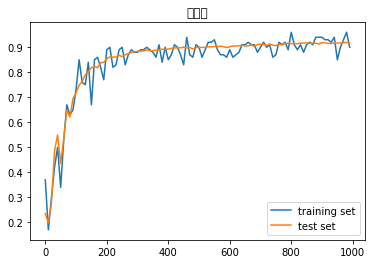

In [1]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
from data.mnist import load_mnist
import pickle
from common import functions
import matplotlib.pyplot as plt

# mnistをロード
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)
train_size = len(x_train)

print("データ読み込み完了")

# 重み初期値補正係数
wieght_init = 0.01 # 変更してみよう
#入力層サイズ
input_layer_size = 784 # 変更してみよう
#中間層サイズ
hidden_layer_size = 40 # 変更してみよう
#出力層サイズ
output_layer_size = 10 # 変更してみよう
# 繰り返し数
iters_num = 1000 # 変更してみよう
# ミニバッチサイズ
batch_size = 100 # 変更してみよ
# 学習率
learning_rate = 0.1 # 変更してみよう
# 描写頻度
plot_interval=10

# 初期設定
def init_network():
    network = {} 
    network['W1'] = wieght_init * np.random.randn(input_layer_size, hidden_layer_size)
    network['W2'] = wieght_init * np.random.randn(hidden_layer_size, output_layer_size)
    # 試してみよう_Xavierの初期値
    # network['W1'] = np.random.randn(input_layer_size, hidden_layer_size) / np.sqrt(input_layer_size)
    # network['W2'] = np.random.randn(hidden_layer_size, output_layer_size) / np.sqrt(hidden_layer_size)
    # 試してみよう Heの初期値
    # network['W1'] = np.random.randn(input_layer_size, hidden_layer_size) / np.sqrt(input_layer_size) * np.sqrt(2)
    # network['W2'] = np.random.randn(hidden_layer_size, output_layer_size) / np.sqrt(hidden_layer_size) * np.sqrt(2)

    network['b1'] = np.zeros(hidden_layer_size)
    network['b2'] = np.zeros(output_layer_size)

    return network

# 順伝播
def forward(network, x):
    W1, W2 = network['W1'], network['W2']
    b1, b2  = network['b1'], network['b2']
        
    u1 =  np.dot(x, W1) + b1
    z1 = functions.relu(u1)
    u2 =  np.dot(z1, W2) + b2
    y = functions.softmax(u2)
 
    return z1, y

# 誤差逆伝播
def backward(x, d, z1, y):
    grad = {}
    
    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']    
    # 出力層でのデルタ
    delta2 = functions.d_softmax_with_loss(d, y)
    # b2の勾配
    grad['b2'] = np.sum(delta2, axis=0)
    # W2の勾配
    grad['W2'] = np.dot(z1.T, delta2)
    # 1層でのデルタ
    delta1 = np.dot(delta2, W2.T) * functions.d_relu(z1)
    # b1の勾配
    grad['b1'] = np.sum(delta1, axis=0)
    # W1の勾配
    grad['W1'] = np.dot(x.T, delta1)

    return grad

# パラメータの初期化
network = init_network()


accuracies_train = []
accuracies_test = []

# 正答率
def accuracy(x, d):
    z1, y = forward(network, x)
    y = np.argmax(y, axis=1)
    if d.ndim != 1 : d = np.argmax(d, axis=1)
    accuracy = np.sum(y == d) / float(x.shape[0])
    return accuracy

for i in range(iters_num):
    # ランダムにバッチを取得    
    batch_mask = np.random.choice(train_size, batch_size)
    # ミニバッチに対応する教師訓練画像データを取得    
    x_batch = x_train[batch_mask]
    # ミニバッチに対応する訓練正解ラベルデータを取得する
    d_batch = d_train[batch_mask]


    
    z1, y = forward(network, x_batch)
    grad = backward(x_batch, d_batch, z1, y)

    if (i+1)%plot_interval==0:
        accr_test = accuracy(x_test, d_test)
        accuracies_test.append(accr_test)
        
        accr_train = accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))

    # パラメータに勾配適用
    for key in ('W1', 'W2', 'b1', 'b2'):
        network[key]  -= learning_rate * grad[key]


lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("正答率")
# グラフの表示
plt.show()

In [2]:
# 試してみよう_Xavierの初期値
# 初期設定
def init_network_Xavier():
    network = {} 
    network['W1'] = wieght_init * np.random.randn(input_layer_size, hidden_layer_size)
    network['W2'] = wieght_init * np.random.randn(hidden_layer_size, output_layer_size)
    
    network['W1'] = np.random.randn(input_layer_size, hidden_layer_size) / np.sqrt(input_layer_size)
    network['W2'] = np.random.randn(hidden_layer_size, output_layer_size) / np.sqrt(hidden_layer_size)

    network['b1'] = np.zeros(hidden_layer_size)
    network['b2'] = np.zeros(output_layer_size)

    return network

In [3]:
# 試してみよう Heの初期値
# 初期設定
def init_network_He():
    network = {} 
    network['W1'] = wieght_init * np.random.randn(input_layer_size, hidden_layer_size)
    network['W2'] = wieght_init * np.random.randn(hidden_layer_size, output_layer_size)
    
    network['W1'] = np.random.randn(input_layer_size, hidden_layer_size) / np.sqrt(input_layer_size) * np.sqrt(2)
    network['W2'] = np.random.randn(hidden_layer_size, output_layer_size) / np.sqrt(hidden_layer_size) * np.sqrt(2)

    network['b1'] = np.zeros(hidden_layer_size)
    network['b2'] = np.zeros(output_layer_size)

    return network

Generation: 10. 正答率(トレーニング) = 0.47
                : 10. 正答率(テスト) = 0.488
Generation: 20. 正答率(トレーニング) = 0.62
                : 20. 正答率(テスト) = 0.7204
Generation: 30. 正答率(トレーニング) = 0.79
                : 30. 正答率(テスト) = 0.785
Generation: 40. 正答率(トレーニング) = 0.8
                : 40. 正答率(テスト) = 0.8102
Generation: 50. 正答率(トレーニング) = 0.84
                : 50. 正答率(テスト) = 0.8264
Generation: 60. 正答率(トレーニング) = 0.82
                : 60. 正答率(テスト) = 0.8221
Generation: 70. 正答率(トレーニング) = 0.82
                : 70. 正答率(テスト) = 0.8574
Generation: 80. 正答率(トレーニング) = 0.82
                : 80. 正答率(テスト) = 0.854
Generation: 90. 正答率(トレーニング) = 0.9
                : 90. 正答率(テスト) = 0.8667
Generation: 100. 正答率(トレーニング) = 0.86
                : 100. 正答率(テスト) = 0.8702
Generation: 110. 正答率(トレーニング) = 0.86
                : 110. 正答率(テスト) = 0.8789
Generation: 120. 正答率(トレーニング) = 0.88
                : 120. 正答率(テスト) = 0.8747
Generation: 130. 正答率(トレーニング) = 0.85
                : 130. 正答率(テスト) = 0.8756
Generation: 140. 正答率(ト

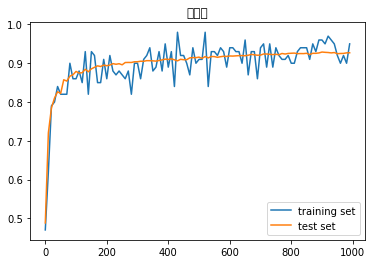

In [4]:
# パラメータの初期化
network = init_network_Xavier()


accuracies_train = []
accuracies_test = []


for i in range(iters_num):
    # ランダムにバッチを取得    
    batch_mask = np.random.choice(train_size, batch_size)
    # ミニバッチに対応する教師訓練画像データを取得    
    x_batch = x_train[batch_mask]
    # ミニバッチに対応する訓練正解ラベルデータを取得する
    d_batch = d_train[batch_mask]


    
    z1, y = forward(network, x_batch)
    grad = backward(x_batch, d_batch, z1, y)

    if (i+1)%plot_interval==0:
        accr_test = accuracy(x_test, d_test)
        accuracies_test.append(accr_test)
        
        accr_train = accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))

    # パラメータに勾配適用
    for key in ('W1', 'W2', 'b1', 'b2'):
        network[key]  -= learning_rate * grad[key]


lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("正答率")
# グラフの表示
plt.show()

Generation: 10. 正答率(トレーニング) = 0.49
                : 10. 正答率(テスト) = 0.5076
Generation: 20. 正答率(トレーニング) = 0.7
                : 20. 正答率(テスト) = 0.6559
Generation: 30. 正答率(トレーニング) = 0.78
                : 30. 正答率(テスト) = 0.7675
Generation: 40. 正答率(トレーニング) = 0.86
                : 40. 正答率(テスト) = 0.8184
Generation: 50. 正答率(トレーニング) = 0.8
                : 50. 正答率(テスト) = 0.842
Generation: 60. 正答率(トレーニング) = 0.85
                : 60. 正答率(テスト) = 0.8512
Generation: 70. 正答率(トレーニング) = 0.87
                : 70. 正答率(テスト) = 0.863
Generation: 80. 正答率(トレーニング) = 0.83
                : 80. 正答率(テスト) = 0.8605
Generation: 90. 正答率(トレーニング) = 0.88
                : 90. 正答率(テスト) = 0.8754
Generation: 100. 正答率(トレーニング) = 0.89
                : 100. 正答率(テスト) = 0.8735
Generation: 110. 正答率(トレーニング) = 0.91
                : 110. 正答率(テスト) = 0.8819
Generation: 120. 正答率(トレーニング) = 0.86
                : 120. 正答率(テスト) = 0.8831
Generation: 130. 正答率(トレーニング) = 0.87
                : 130. 正答率(テスト) = 0.8875
Generation: 140. 正答率(

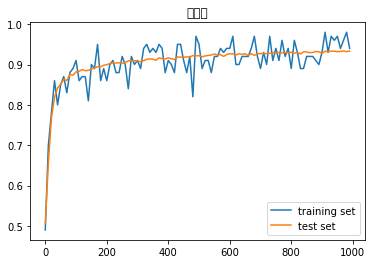

In [5]:
# パラメータの初期化
network = init_network_He()


accuracies_train = []
accuracies_test = []


for i in range(iters_num):
    # ランダムにバッチを取得    
    batch_mask = np.random.choice(train_size, batch_size)
    # ミニバッチに対応する教師訓練画像データを取得    
    x_batch = x_train[batch_mask]
    # ミニバッチに対応する訓練正解ラベルデータを取得する
    d_batch = d_train[batch_mask]


    
    z1, y = forward(network, x_batch)
    grad = backward(x_batch, d_batch, z1, y)

    if (i+1)%plot_interval==0:
        accr_test = accuracy(x_test, d_test)
        accuracies_test.append(accr_test)
        
        accr_train = accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))

    # パラメータに勾配適用
    for key in ('W1', 'W2', 'b1', 'b2'):
        network[key]  -= learning_rate * grad[key]


lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("正答率")
# グラフの表示
plt.show()

Generation: 10. 正答率(トレーニング) = 0.12
                : 10. 正答率(テスト) = 0.1074
Generation: 20. 正答率(トレーニング) = 0.1
                : 20. 正答率(テスト) = 0.158
Generation: 30. 正答率(トレーニング) = 0.17
                : 30. 正答率(テスト) = 0.2138
Generation: 40. 正答率(トレーニング) = 0.27
                : 40. 正答率(テスト) = 0.2853
Generation: 50. 正答率(トレーニング) = 0.34
                : 50. 正答率(テスト) = 0.3544
Generation: 60. 正答率(トレーニング) = 0.46
                : 60. 正答率(テスト) = 0.4116
Generation: 70. 正答率(トレーニング) = 0.44
                : 70. 正答率(テスト) = 0.4645
Generation: 80. 正答率(トレーニング) = 0.57
                : 80. 正答率(テスト) = 0.507
Generation: 90. 正答率(トレーニング) = 0.58
                : 90. 正答率(テスト) = 0.551
Generation: 100. 正答率(トレーニング) = 0.48
                : 100. 正答率(テスト) = 0.5678
Generation: 110. 正答率(トレーニング) = 0.6
                : 110. 正答率(テスト) = 0.5941
Generation: 120. 正答率(トレーニング) = 0.58
                : 120. 正答率(テスト) = 0.6161
Generation: 130. 正答率(トレーニング) = 0.68
                : 130. 正答率(テスト) = 0.6502
Generation: 140. 正答率(ト

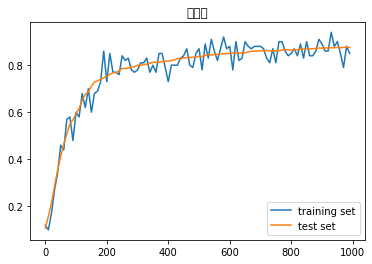

In [12]:
# 重み初期値補正係数
wieght_init = 0.01 # 変更してみよう

#中間層サイズ
hidden_layer_size = 40 # 変更してみよう

# 繰り返し数
iters_num = 1000 # 変更してみよう
# ミニバッチサイズ
batch_size = 100 # 変更してみよ
# 学習率
learning_rate = 0.01 # 変更してみよう
# 描写頻度
plot_interval=10


# パラメータの初期化
network = init_network_Xavier()


accuracies_train = []
accuracies_test = []


for i in range(iters_num):
    # ランダムにバッチを取得    
    batch_mask = np.random.choice(train_size, batch_size)
    # ミニバッチに対応する教師訓練画像データを取得    
    x_batch = x_train[batch_mask]
    # ミニバッチに対応する訓練正解ラベルデータを取得する
    d_batch = d_train[batch_mask]


    
    z1, y = forward(network, x_batch)
    grad = backward(x_batch, d_batch, z1, y)

    if (i+1)%plot_interval==0:
        accr_test = accuracy(x_test, d_test)
        accuracies_test.append(accr_test)
        
        accr_train = accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))

    # パラメータに勾配適用
    for key in ('W1', 'W2', 'b1', 'b2'):
        network[key]  -= learning_rate * grad[key]


lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("正答率")
# グラフの表示
plt.show()

Generation: 10. 正答率(トレーニング) = 0.29
                : 10. 正答率(テスト) = 0.3464
Generation: 20. 正答率(トレーニング) = 0.19
                : 20. 正答率(テスト) = 0.1825
Generation: 30. 正答率(トレーニング) = 0.42
                : 30. 正答率(テスト) = 0.5076
Generation: 40. 正答率(トレーニング) = 0.51
                : 40. 正答率(テスト) = 0.5189
Generation: 50. 正答率(トレーニング) = 0.64
                : 50. 正答率(テスト) = 0.6653
Generation: 60. 正答率(トレーニング) = 0.54
                : 60. 正答率(テスト) = 0.5935
Generation: 70. 正答率(トレーニング) = 0.65
                : 70. 正答率(テスト) = 0.7026
Generation: 80. 正答率(トレーニング) = 0.55
                : 80. 正答率(テスト) = 0.5611
Generation: 90. 正答率(トレーニング) = 0.55
                : 90. 正答率(テスト) = 0.5058
Generation: 100. 正答率(トレーニング) = 0.7
                : 100. 正答率(テスト) = 0.643
Generation: 110. 正答率(トレーニング) = 0.79
                : 110. 正答率(テスト) = 0.7677
Generation: 120. 正答率(トレーニング) = 0.76
                : 120. 正答率(テスト) = 0.7842
Generation: 130. 正答率(トレーニング) = 0.86
                : 130. 正答率(テスト) = 0.8752
Generation: 140. 正答

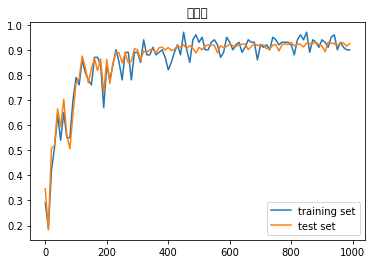

In [13]:
# 重み初期値補正係数
wieght_init = 0.01 # 変更してみよう

#中間層サイズ
hidden_layer_size = 40 # 変更してみよう

# 繰り返し数
iters_num = 1000 # 変更してみよう
# ミニバッチサイズ
batch_size = 100 # 変更してみよ
# 学習率
learning_rate = 1 # 変更してみよう
# 描写頻度
plot_interval=10


# パラメータの初期化
network = init_network_Xavier()


accuracies_train = []
accuracies_test = []


for i in range(iters_num):
    # ランダムにバッチを取得    
    batch_mask = np.random.choice(train_size, batch_size)
    # ミニバッチに対応する教師訓練画像データを取得    
    x_batch = x_train[batch_mask]
    # ミニバッチに対応する訓練正解ラベルデータを取得する
    d_batch = d_train[batch_mask]


    
    z1, y = forward(network, x_batch)
    grad = backward(x_batch, d_batch, z1, y)

    if (i+1)%plot_interval==0:
        accr_test = accuracy(x_test, d_test)
        accuracies_test.append(accr_test)
        
        accr_train = accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))

    # パラメータに勾配適用
    for key in ('W1', 'W2', 'b1', 'b2'):
        network[key]  -= learning_rate * grad[key]


lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("正答率")
# グラフの表示
plt.show()

# 考察
MNISTに対するNNの適用は過去にも行ったことがあったが、あらためて復習することができた。

ハイパーパラメータの違いによる挙動の違いを確認できた。

Xavierの初期値やHeの初期値について、実装により理解を深めることができた。

参考情報：
- [Xavierの初期値とは](https://qiita.com/Becon147/items/a9971041bca5c10483bc)
>Xavierの初期値は、主にシグモイド関数等を活性化関数として用いた時に効果を発揮する初期値である。

- [ニューラルネットワークの重みの初期値について解説](https://ai-trend.jp/basic-study/neural-network/initial_value/#:~:text=He%E3%81%AE%E5%88%9D%E6%9C%9F%E5%80%A4%E3%81%AF,%E9%87%8D%E3%81%BF%E3%82%92%E8%A8%AD%E5%AE%9A%E3%81%97%E3%81%BE%E3%81%99%E3%80%82)
>ニューラルネットワークの活性化関数がReLU関数の時はHeの初期値を用いて、それ以外の時はXivierの初期値を用いるとよいでしょう。